## CIFAR10 Dataset - Convolutional Neural Network

### Importing Necessary Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
# Check Tensorflow version
print(f"Tensorflow version is: {tf.__version__}")

Tensorflow version is: 2.3.0


In [3]:
# Check GPU availability
print("GPU", "is available" if tf.config.list_physical_devices("GPU") else "is not available")

GPU is available


### Get Data Ready
* CIFAR10 dataset

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(X, y), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [6]:
# Classes of data in CIFAR10 dataset
classes = ["airplane",
"automobile",
"bird",
"cat",
"deer",
"dog",
"frog",
"horse",
"ship",
"truck"]

In [7]:
# Create a function to check data according to it's shape (Training, validation or test)
def check_shape(X, y, valid_data = False, test_data = False):
  """
  Finds a shape of given data and returns.
  """
  if valid_data:
    print(f"Shape of validation images: {X.shape}")
    print(f"Shape of validation labels: {y.shape}")
  
  elif test_data:
    print(f"Shape of test images: {X.shape}")
    print(f"Shape of test labels: {y.shape}")

  else:
    print(f"Shape of training images: {X.shape}")
    print(f"Shape of training labels: {y.shape}")

In [8]:
check_shape(X, y)

Shape of training images: (50000, 32, 32, 3)
Shape of training labels: (50000, 1)


In [9]:
check_shape(X_test, y_test, test_data = True)

Shape of test images: (10000, 32, 32, 3)
Shape of test labels: (10000, 1)


In [13]:
y[0][0]

6

In [18]:
# Create a function to visualize some images
def show_25_images(images, labels):
  """
  Plots the given images and put the corresponding label to the under of image.
  """

  plt.figure(figsize = (7, 9))

  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])
    plt.xlabel(classes[labels[i][0]])
  
  plt.show();

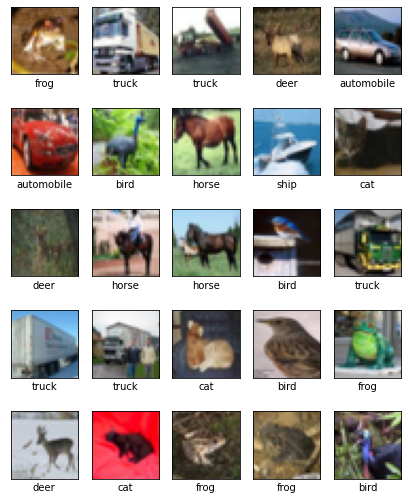

In [19]:
show_25_images(images = X,
               labels = y)

### Preprocessing of images and labels

In [20]:
# Normalize pixel values from 0-255 to 0-1
X = X.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [21]:
# Find number of classes
num_classes = len(np.unique(y))
num_classes

10

In [23]:
# One hot encoding labels
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes)
y_test = to_categorical(y_test, num_classes)

In [24]:
y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [25]:
# Check shape again
check_shape(X, y)

Shape of training images: (50000, 32, 32, 3)
Shape of training labels: (50000, 10)


In [26]:
check_shape(X_test, y_test, test_data = True)

Shape of test images: (10000, 32, 32, 3)
Shape of test labels: (10000, 10)


### Creating Convolutional Neural Network Without Batching Methodology

In [27]:
X.shape[1:]

(32, 32, 3)

In [30]:
# Create a function to build and compile CNN model
def build_and_compile_model():
  """
  Builds a CNN model and compiles it. 
  """

  model = tf.keras.Sequential([
          tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (X.shape[1:])),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Dropout(rate = 0.2),

          
          tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Dropout(rate = 0.2),

          
          tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Dropout(rate = 0.2),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation = "relu"),
          tf.keras.layers.Dropout(rate = 0.2),
          tf.keras.layers.Dense(units = num_classes, activation = "softmax")
  ])

  # Compile model
  model.compile(
      optimizer = tf.keras.optimizers.Adam(),
      loss = tf.keras.losses.CategoricalCrossentropy(),
      metrics = ["accuracy"]
  )

  # Return the model
  return model

In [31]:
model = build_and_compile_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

In [32]:
# Create a EarlyStopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience = 3)

### Creating Our Own Validation Set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size = 0.2)

In [34]:
check_shape(X_val, y_val, valid_data = True)

Shape of validation images: (10000, 32, 32, 3)
Shape of validation labels: (10000, 10)


### Fit the model to the data

In [35]:
history = model.fit(x = X_train,
                    y = y_train,
                    batch_size = 32,
                    epochs = 100,
                    callbacks = [early_stopping],
                    validation_data = (X_val, y_val))

Epoch 1/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6113 - accuracy: 0.4080 - val_loss: 1.2449 - val_accuracy: 0.5468
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2316 - accuracy: 0.5594 - val_loss: 1.0156 - val_accuracy: 0.6447
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0699 - accuracy: 0.6207 - val_loss: 0.9717 - val_accuracy: 0.6561
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9793 - accuracy: 0.6539 - val_loss: 0.8734 - val_accuracy: 0.6922
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9119 - accuracy: 0.6791 - val_loss: 0.8109 - val_accuracy: 0.7170
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8510 - accuracy: 0.7035 - val_loss: 0.8118 - val_accuracy: 0.7120
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8181 - accuracy: 0.7127 - val_loss: 0.7634 - val_ac

In [36]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7892 - accuracy: 0.7426


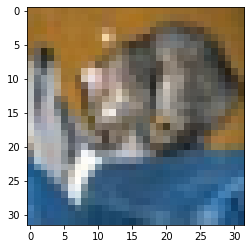

In [37]:
plt.imshow(X_test[0])

In [38]:
preds = model.predict(X_test)
preds

array([[3.6548486e-04, 2.0593542e-03, 8.1778731e-04, ..., 4.0476167e-04,
        9.3639374e-04, 1.8453365e-03],
       [1.5042916e-04, 2.1084938e-02, 2.1437950e-10, ..., 7.5589218e-10,
        9.7868311e-01, 8.0384736e-05],
       [7.1162760e-02, 5.2521476e-03, 2.3015732e-02, ..., 4.5546019e-03,
        7.7852798e-01, 7.0121964e-03],
       ...,
       [3.6100573e-07, 3.6903195e-08, 1.5099615e-02, ..., 7.6608895e-03,
        1.3448740e-06, 1.5438059e-07],
       [5.0862017e-04, 3.0398425e-02, 1.9293266e-03, ..., 6.3404017e-03,
        9.4028394e-05, 2.8690568e-04],
       [8.5679276e-11, 2.0630812e-13, 6.5472022e-08, ..., 9.9980003e-01,
        1.4011002e-11, 1.7270047e-12]], dtype=float32)

In [39]:
classes[np.argmax(y_test[0])]

'cat'

In [40]:
classes[np.argmax(preds[0])]

'cat'

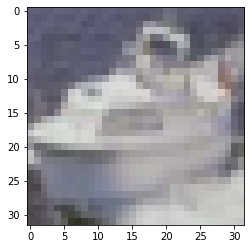

In [80]:
plt.imshow(X_test[199])

In [81]:
classes[np.argmax(y_test[199])]

'ship'

In [82]:
classes[np.argmax(preds[199])]

'cat'